In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Solving 2nd order Elliptical equation: electric field


We wish to find the electric potential in 2D space around a distribution of electric charges.

We define the computation box : a cartesian 2D space grid (i,j) with $X_i=i*dx$ and $Y_j=j*dy$. $0 < i< N_{i-1}$ and  $0 < j< N_{j-1}$. dx=1, dy=1

In this grid we wil put some electric charges at some locations and the exercice will be to determine the electric potential at all locations : $U_{i,j}$. The equation linking the electric potential to the charge distribution is the Poisson equation:

$\Delta(U)=-\rho/\epsilon_0$ where $\rho$ is the charge density $(coulomb/m^3)$ and $\Delta$ is the laplacian operator.


First define :
Nx=100
Ny=100
xc=50
yc=50
dx=1.
dy=1.
Then build an array U with size (Nx,NY) that contains zeros everywhere.U will be the potiental
Build an array Rho, the distrubution of charges that contain 1 charge +1 in center. The center has coordinates Xc=50, Yc=50.  We will take $\epsilon_0=1$ for simplicity.


In [2]:
# Dimensionality parameters
Nx = 100
Ny = 100
xc = 50
yc = 50
dx = 1
dy = 1

#potential array 
U = np.zeros([Nx,Ny])

#charges distribution
rho = np.zeros([Nx,Ny])
rho[xc,yc] = 1



Display graphically the Rho array with numpy function :np.imshow(Rho, origin='lower') : origin='lower' is useful to put the (0,0) point in the lower left corner.


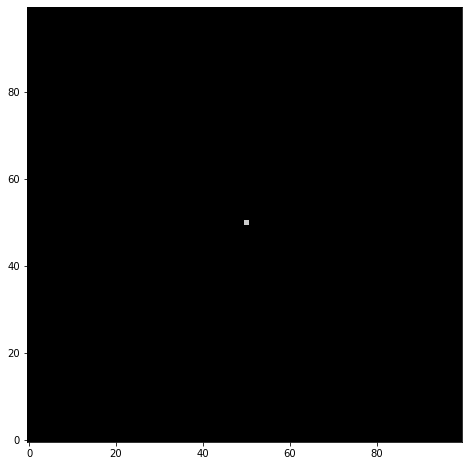

In [3]:
plt.figure(figsize=(8,8))
plt.imshow(rho,origin="lower",cmap="nipy_spectral")

now we will try to find the U potential that solves the Poisson equation $\Delta(U)=-\rho/\epsilon_0$, with boundary conditions U=0 on the edges of the computation box.

Write the laplacian operator using first order finite differences in the form :Laplacian(i,j)=U(i-1,j)+ ...... as a function of the system parameters (U(i,j), dx, dy, i,j etc...)

Write a python function 
one_step_jacobi(U, rho, dx, dy, Nx, Ny)
That takes as input parameters (U, rho, dx, dy, Nx, Ny) and that returns $U_{N+1}$ when the input parameter $U$ corresponds to $U_N$ using the jacpbi method. Pay attention to boundary conditions !!

In [4]:
def one_step_jacobi(U, rho, dx, dy, Nx, Ny):
    Unew=np.zeros([Nx, Ny]) # new array
    
    for i in range(1,Nx-1):
        for j in range(1,Ny-1):
            u = (U[(i+1),(j)]+U[(i-1),(j)]+U[(i),(j+1)]+U[(i),(j-1)])/4 # next step
            r = dx*dy*rho[i,j]/4
            Unew[i,j] = u+r #new value in i,j

    
    
    return Unew
   


Write a funcion error(U,Unew) that returns the maximum difference between U and Unew (in absolute value)



In [5]:
def error(U,Unew): #error function (abs difference)
    return np.max(np.abs(U-Unew))

Using the above elements write a code that computes iteratively U and that stops when error<eps= 0.001.
When the iteration stops display U with np.imshow( ....) Display also the number of iterations.

In [6]:
def compute_potential_J(U,rho,dx=dx,dy=dy,Nx=Nx,Ny=Ny,eps=0.001,plot=True):
    actual_e = 10*eps #start with error superior to limit
    actual_U = U.copy()  # U after i-th iteration
    
    n_it = 0 #iteration umber
    print("Beginning of cycles (Jacobi method)")
    while(actual_e>eps):
        n_it +=1
        #print("error value : ",actual_e)
        newU = one_step_jacobi(actual_U,rho,dx,dy,Nx,Ny)
        actual_e=error(actual_U,newU)
        actual_U = newU.copy()
    print("error limit reached after {} iterations! (eps = {})".format(n_it,eps))
    if(plot):
        plt.imshow(actual_U,origin="lower",cmap="nipy_spectral")
    return actual_U

Beginning of cycles (Jacobi method)
error limit reached after 160 iterations! (eps = 0.001)


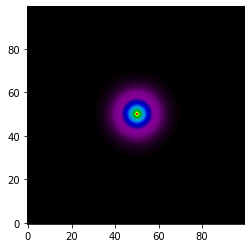

In [7]:
potU = compute_potential_J(U,rho)

PLot the electric potential U along the line X=50 or Y=50 , and show $\bf{graphically}$ that it is follows approximatively
$U(r)=\frac{q}{\epsilon_0 r}$.


<ipython-input-8-1ef4aa21f539>:3: RuntimeWarning: divide by zero encountered in true_divide
  theoricU = 1/np.abs(x_-50)


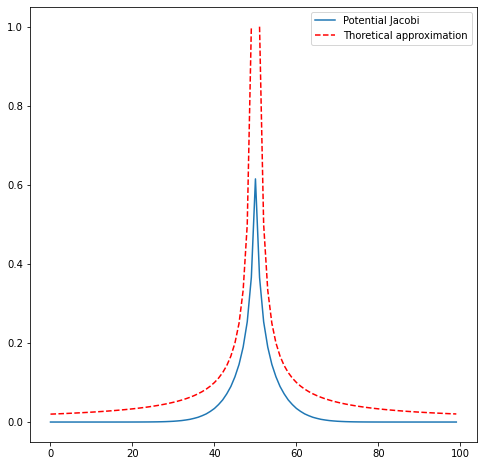

In [8]:
plotline = potU[50,:]
x_ = np.arange(len(plotline))
theoricU = 1/np.abs(x_-50)
plt.figure(figsize=(8,8))
plt.plot(x_,plotline,label="Potential Jacobi")
plt.plot(x_,theoricU,c="r",linestyle="--",label="Thoretical approximation")
plt.legend()

How many iterations are needed for eps=0.01, eps=0.001, eps=0.0001 ?

In [9]:
U_ = compute_potential_J(U,rho,eps=0.01,plot=False)
U_ = compute_potential_J(U,rho,eps=0.001,plot=False)
U_ = compute_potential_J(U,rho,eps=0.0001,plot=False)

Beginning of cycles (Jacobi method)
error limit reached after 16 iterations! (eps = 0.01)
Beginning of cycles (Jacobi method)
error limit reached after 160 iterations! (eps = 0.001)
Beginning of cycles (Jacobi method)
error limit reached after 1580 iterations! (eps = 0.0001)


Now we  consider a dipole : we put a charge +1 at Xc=50 and Yc=75 and a charge at Xc=50 and Yc=25 in the Rho array.
    Find the potential U(i,j) for eps=0.01. Display the potential using contours with matplotlib contourplot (np.contour( ....)).

Beginning of cycles (Jacobi method)
error limit reached after 16 iterations! (eps = 0.01)


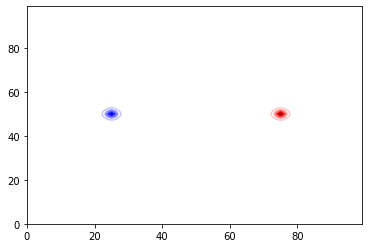

In [10]:
#charges distribution
rho = np.zeros([Nx,Ny])
rho[50,75] = 1
rho[50,25] = -1
U_ = compute_potential_J(U,rho,eps=0.01,plot=False)

x = np.arange(Nx)
y = np.arange(Ny)
X, Y = np.meshgrid(x, y)
#plt.imshow(U_,cmap="seismic")
plt.contour(X, Y, U_,levels=20,cmap="seismic")

#plt.contour(U_)


Redo the same with the Gauss Seidel Method for the dipole. Put your code below :
    

In [11]:
def one_gauss_sediel(U, rho, dx, dy, Nx, Ny):
    Unew=np.zeros([Nx, Ny])
    
    for i in range(Nx):
        for j in range(Ny):
            Unew[i,j] = (U[(i+1)%Nx,(j)%Ny]+Unew[(i-1)%Nx,(j)%Ny]+U[(i)%Nx,(j+1)%Ny]+Unew[(i)%Nx,(j-1)%Ny])/4 + (rho[i,j]*dx*dy/4) 
    return Unew

def compute_potential_GS(U,rho,dx=dx,dy=dy,Nx=Nx,Ny=Ny,eps=0.001,plot=True):
    actual_e = 10*eps
    actual_U = U.copy() 
    
    n_it = 0
    print("Beginning of cycles (Gauss-Sediel method)")
    while(actual_e>eps):
        n_it +=1
        #print("error value : ",actual_e)
        newU = one_gauss_sediel(actual_U,rho,dx,dy,Nx,Ny)
        actual_e=error(actual_U,newU)
        actual_U = newU.copy()
    print("error limit reached after {} iterations! (eps = {})".format(n_it,eps))
    if(plot):
        plt.imshow(actual_U,origin="lower",cmap="nipy_spectral")
    return actual_U

Beginning of cycles (Gauss-Sediel method)
error limit reached after 9 iterations! (eps = 0.01)


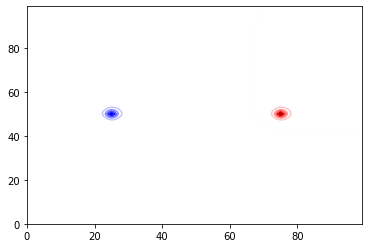

In [12]:

#charges distribution
rho = np.zeros([Nx,Ny])
rho[50,75] = 1
rho[50,25] = -1
U_ = compute_potential_GS(U,rho,eps=0.01,plot=False)

x = np.arange(Nx)
y = np.arange(Ny)
X, Y = np.meshgrid(x, y)
#plt.imshow(U_,cmap="seismic")
plt.contour(X, Y, U_,levels=20,cmap="seismic")

#plt.contour(U_)

Compare the number of iterations for Jacobi and Gauss Siedel for eps=0.01, eps=0.001, eps=0.0001

In [13]:
U_ = compute_potential_GS(U,rho,eps=0.01,plot=False)
U_ = compute_potential_GS(U,rho,eps=0.001,plot=False)
U_ = compute_potential_GS(U,rho,eps=0.0001,plot=False)

Beginning of cycles (Gauss-Sediel method)
error limit reached after 9 iterations! (eps = 0.01)
Beginning of cycles (Gauss-Sediel method)
error limit reached after 81 iterations! (eps = 0.001)
Beginning of cycles (Gauss-Sediel method)
error limit reached after 612 iterations! (eps = 0.0001)


**NOTE:** the number of iterations needed to reach a quasi static change betweeen stps is lowered a lot with the Gauss cediel method. The number of iterationes is reduced approximately by half.

Redo the same with over-relaxation method and beta=1.5. 

In [14]:
def one_SOR(U, rho, dx, dy, Nx, Ny,beta):
    Unew=np.zeros([Nx, Ny])
    
    for i in range(Nx):
        for j in range(Ny):
            Unew[i,j] = (U[(i+1)%Nx,(j)%Ny]+Unew[(i-1)%Nx,(j)%Ny]+U[(i)%Nx,(j+1)%Ny]+Unew[(i)%Nx,(j-1)%Ny] + rho[i,j]*dx*dy)*beta/4 + ((1-beta)*U[i,j]) 
    return Unew

def compute_potential_SOR(U,rho,beta,dx=dx,dy=dy,Nx=Nx,Ny=Ny,eps=0.001,plot=True):
    actual_e = 10*eps
    actual_U = U.copy() 
    
    n_it = 0
    print("Beginning of cycles (SOR method)")
    while(actual_e>eps):
        n_it +=1
        #print("error value : ",actual_e)
        newU = one_SOR(actual_U,rho,dx,dy,Nx,Ny,beta)
        actual_e=error(actual_U,newU)
        actual_U = newU.copy()
    print("error limit reached after {} iterations! (eps = {})".format(n_it,eps))
    if(plot):
        plt.imshow(actual_U,origin="lower",cmap="nipy_spectral")
    return actual_U

Beginning of cycles (SOR method)
error limit reached after 10 iterations! (eps = 0.01)


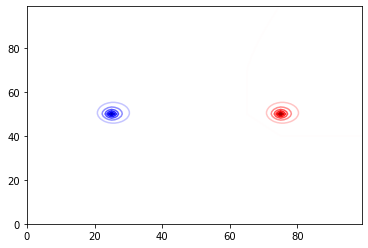

In [15]:
#charges distribution
rho = np.zeros([Nx,Ny])
rho[50,75] = 1
rho[50,25] = -1
U_ = compute_potential_SOR(U,rho,beta=1.5,eps=0.01,plot=False)

x = np.arange(Nx)
y = np.arange(Ny)
X, Y = np.meshgrid(x, y)
#plt.imshow(U_,cmap="seismic")
plt.contour(X, Y, U_,levels=20,cmap="seismic")

#plt.contour(U_)

In [16]:
U_ = compute_potential_SOR(U,rho,beta=1.5,eps=0.01,plot=False)
U_ = compute_potential_SOR(U,rho,beta=1.5,eps=0.001,plot=False)
U_ = compute_potential_SOR(U,rho,beta=1.5,eps=0.0001,plot=False)

Beginning of cycles (SOR method)
error limit reached after 10 iterations! (eps = 0.01)
Beginning of cycles (SOR method)
error limit reached after 81 iterations! (eps = 0.001)
Beginning of cycles (SOR method)
error limit reached after 349 iterations! (eps = 0.0001)


What is your conclusion ?

**NOTE:** SOR method needs even less steps to reach the stop value in change between iterations, but requires a more dedicated calculus. It reduces the number of steps needed but we are not sure if it reduces computing time.

Using the Jacobi method we now consider the dipole. We wish to compute the electric force everywhere . It is given by Force=-gradient(U). Do not forget that a Force is a vector.
Using finite difference what are (Fx,Fy) the X and y component of the force at location (i,j) ? gives Fx(i,j) using U(i,j), dx, etc... . Same for Fy(i,j)



In [17]:
def give_forces(U,dx=dx,dy=dy,Nx=Nx,Ny=Ny):
    Fx = np.zeros([Nx,Ny])
    Fy = np.zeros([Nx,Ny])
    
    for  i in range(Nx):
        for  j in range(Ny):
            Fy[i,j] = -(U[(i-1)%Nx,j]-U[(i+1)%Nx,j])/(2*dx)
            Fx[i,j] = -(U[i,(j-1)%Ny]-U[i,(j+1)%Ny])/(2*dy)
    return Fx,Fy

Write a python procedure that Computes for every location (i,j) the force vector  (Fx and Fy).

In [18]:
U_ = compute_potential_J(U,rho,eps=0.001,plot=False)
fx_,fy_  = give_forces(U_)

Beginning of cycles (Jacobi method)
error limit reached after 160 iterations! (eps = 0.001)


Display the force field in the system using "quiver" (an example is here : https://moonbooks.org/Articles/How-to-plot-a-simple-vector-field-in-matplotlib-/)

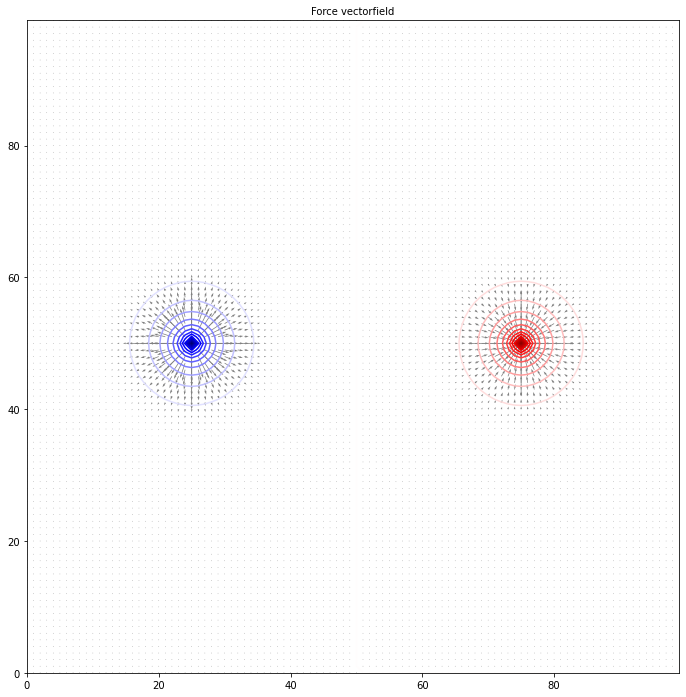

In [19]:

X, Y = np.meshgrid(np.arange(Nx), np.arange(Ny))

plt.figure(figsize=(12,12))
ax = plt.subplot()
plt.quiver(X, Y,fx_, fy_, units='xy',scale=0.02,width=0.11 , color='grey')
plt.contour(X, Y, U_,levels=30,cmap="seismic")
ax.set_aspect('equal')


plt.title('Force vectorfield',fontsize=10)

#plt.savefig('how_to_plot_a_vector_field_in_matplotlib_fig1.png', bbox_inches='tight')
plt.show()
#plt.close()

Now let's have more fun : put randomly 50 charges (+1 or -1) in your computation box.
1- Compute U, the electric potential with eps=0.001 or 0.01 (if it takes too long).
2- Display U
3- Display the force field using Quiver

Beginning of cycles (SOR method)
error limit reached after 312 iterations! (eps = 0.001)


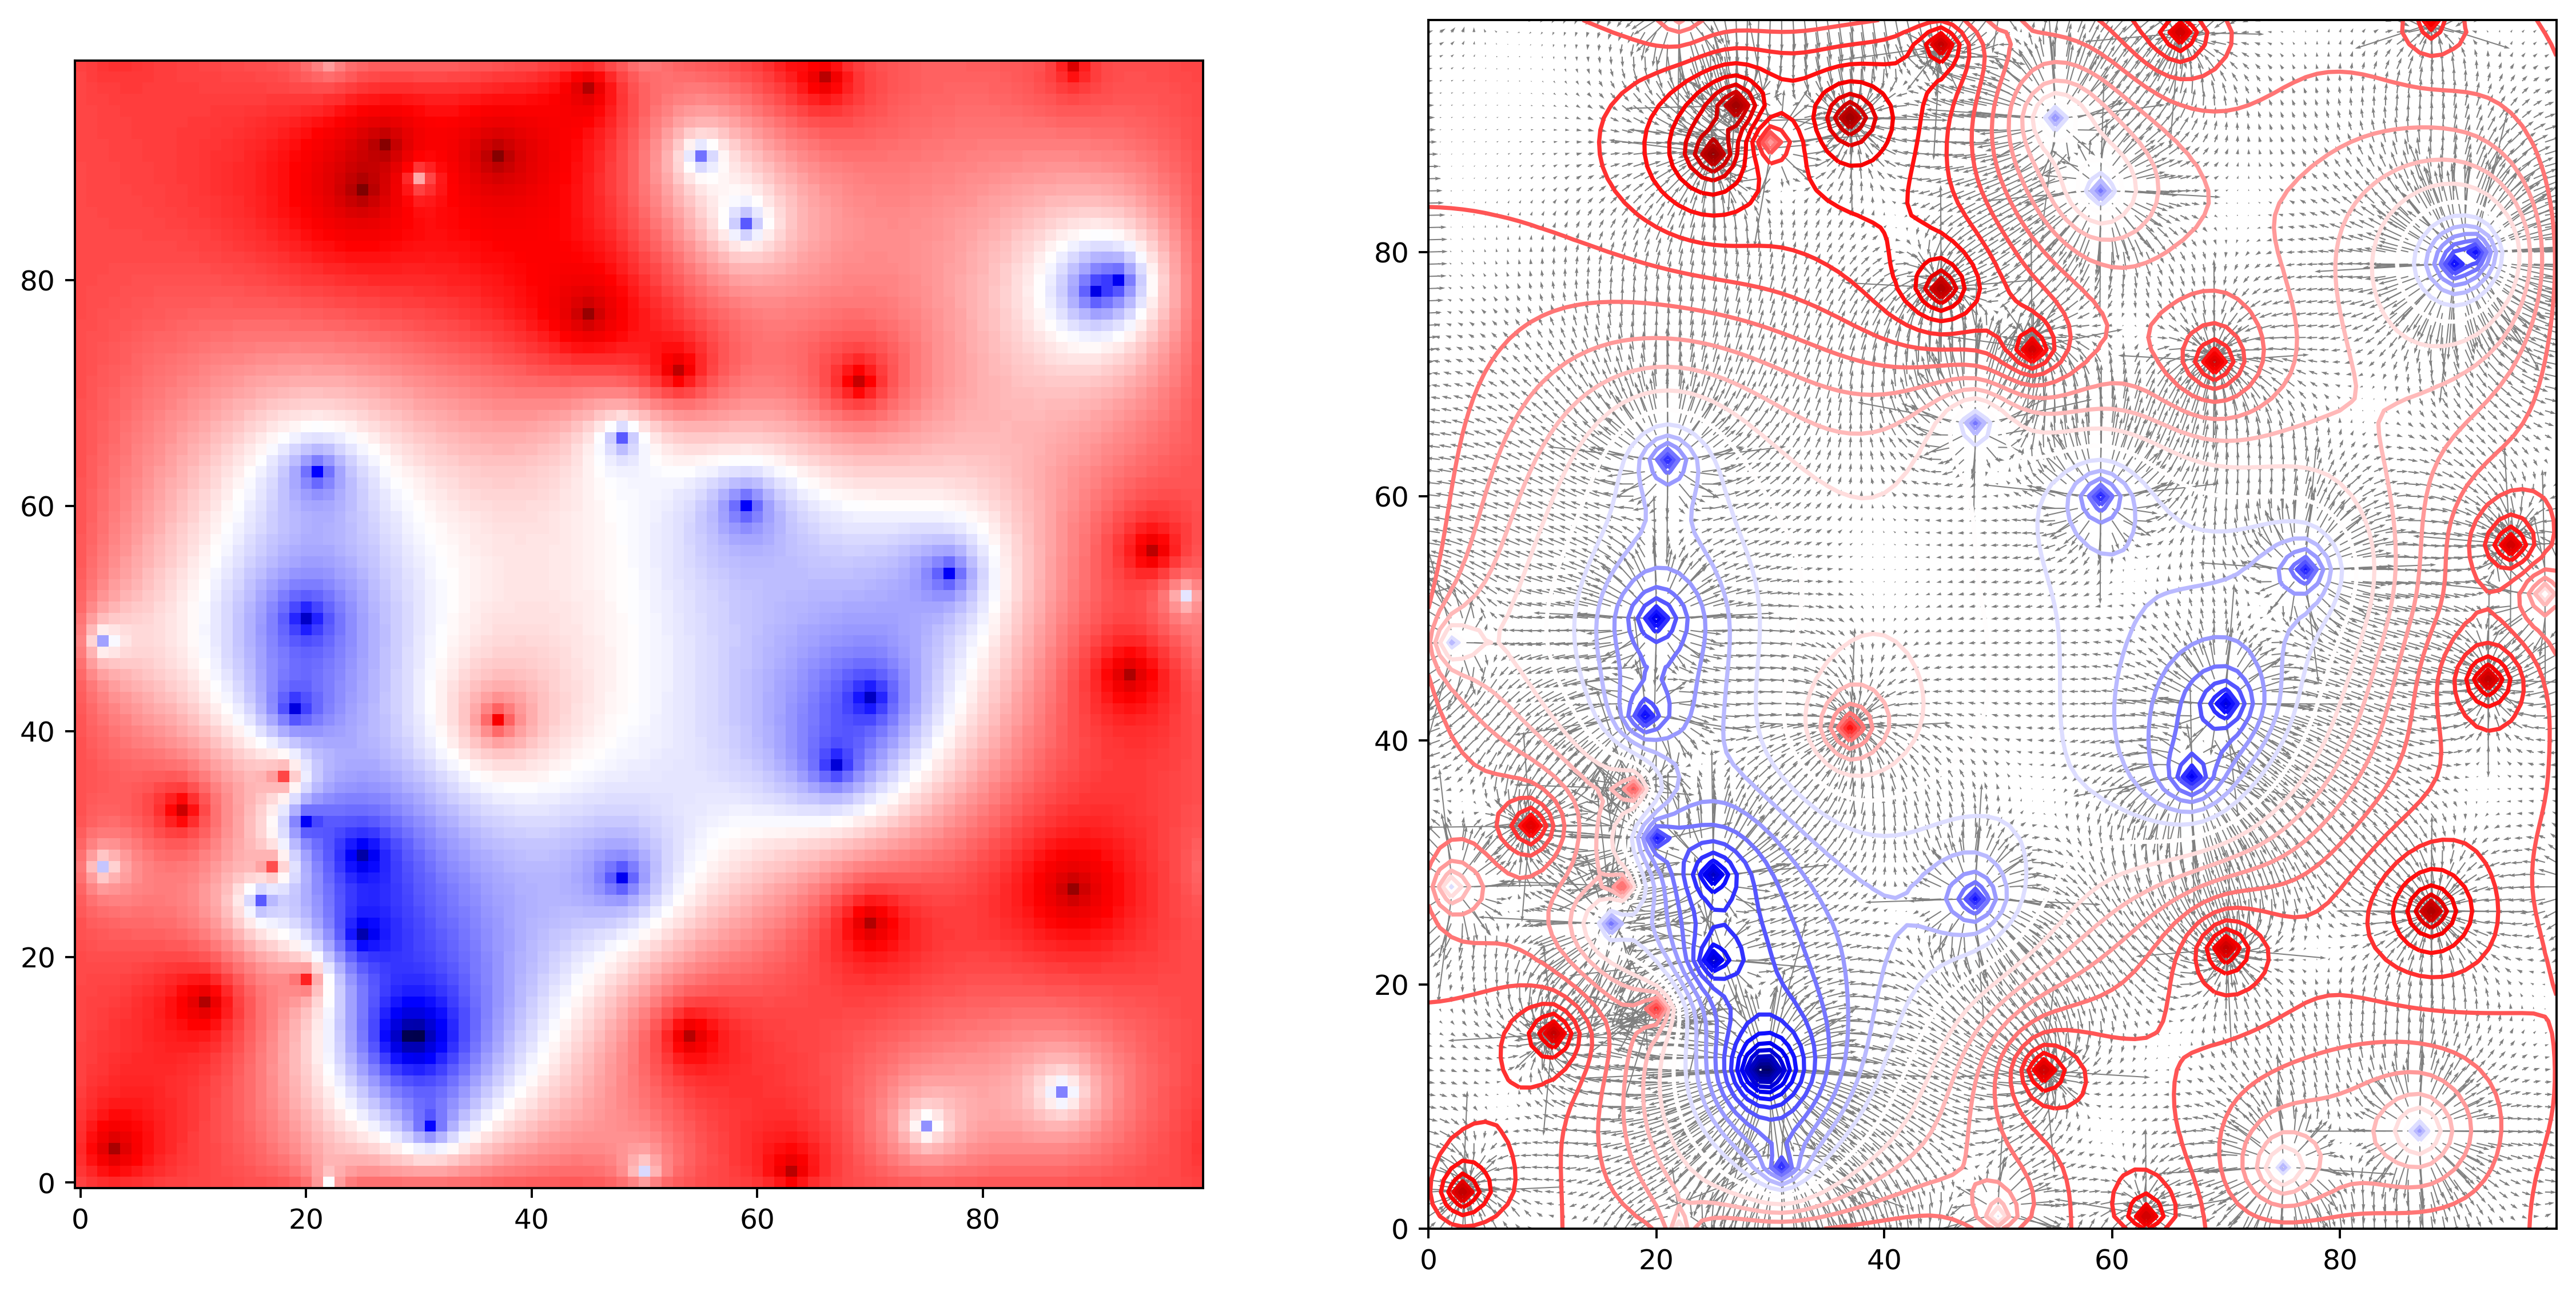

In [20]:
rho = np.zeros([Nx,Ny])
rand_part = 50

for i in range(rand_part):
    ranx = np.random.randint(Nx)
    rany = np.random.randint(Ny)
    rho[ranx,rany] = np.random.choice([-1,1])

U_ = compute_potential_SOR(U,rho,beta=1.5,eps=0.001,plot=False)
fx_,fy_ = give_forces(U_)

X, Y = np.meshgrid(np.arange(Nx), np.arange(Ny))

plt.figure(figsize=(16,8),dpi=350)
#plt.subplot(1,2,1)
#plt.imshow(rho,cmap="bwr",origin="lower")
plt.subplot(1,2,1)
plt.imshow(U_,cmap="seismic",origin="lower")
plt.subplot(1,2,2)
plt.quiver(X, Y,fx_, fy_, units='xy',scale=0.02,width=0.1 , color='grey')
plt.contour(X, Y, U_,levels=35,cmap="seismic")